<a href="https://colab.research.google.com/github/danie-cp/Projects/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio.v3 as iio
import cv2
np.set_printoptions(threshold=np.inf, linewidth=300)
from IPython.display import Image

In [ ]:
# Connect your Google Colab to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Install ultralytics to access YOLO
# if asked to restart the session after the installation, restart, then re-run this block
!pip install ultralytics torch torchvision
import ultralytics
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


#Image Extraction


In [ ]:
for idx, frame in enumerate(iio.imiter("/content/drive/MyDrive/Colab Notebooks/Data/ProjectClip1.mp4")):
    iio.imwrite(f"/content/drive/MyDrive/Colab Notebooks/Data/ProjectFrames/ProjectClip1_{idx:03d}.jpg", frame)

In [ ]:
for idx, frame in enumerate(iio.imiter("/content/drive/MyDrive/Colab Notebooks/Data/ProjectClip2.mp4")):
    iio.imwrite(f"/content/drive/MyDrive/Colab Notebooks/Data/ProjectFrames/ProjectClip2_{idx:03d}.jpg", frame)

In [ ]:
for idx, frame in enumerate(iio.imiter("/content/drive/MyDrive/Colab Notebooks/Data/ProjectClip3.mp4")):
    iio.imwrite(f"/content/drive/MyDrive/Colab Notebooks/Data/ProjectFrames/ProjectClip3_{idx:03d}.jpg", frame)

#Model Development

In [ ]:
## Train a YOLOv8 small model for 50 epochs
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Volleyball_v1/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Volleyball_v1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [ ]:
## Copy results to google drive
!cp -r /content/runs/detect/train4 /content/drive/MyDrive/Volleyball_v1/results50

In [ ]:
## Train a YOLOv8 small model for 50 more epochs
!yolo task=detect mode=train model=/content/drive/MyDrive/Volleyball_v1/results50/weights/best.pt data=/content/drive/MyDrive/Volleyball_v1/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Volleyball_v1/results50/weights/best.pt, data=/content/drive/MyDrive/Volleyball_v1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

In [ ]:
## Copy results to google drive
!cp -r /content/runs/detect/train /content/drive/MyDrive/Volleyball_v1/results100

In [ ]:
## Train a YOLOv8 small model for 50 more epochs
!yolo task=detect mode=train model=/content/drive/MyDrive/Volleyball_v1/results100/weights/best.pt data=/content/drive/MyDrive/Volleyball_v1/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Volleyball_v1/results100/weights/best.pt, data=/content/drive/MyDrive/Volleyball_v1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [ ]:
## Copy results to google drive
!cp -r /content/runs/detect/train2 /content/drive/MyDrive/Volleyball_v1/results150

#Performance Assesment

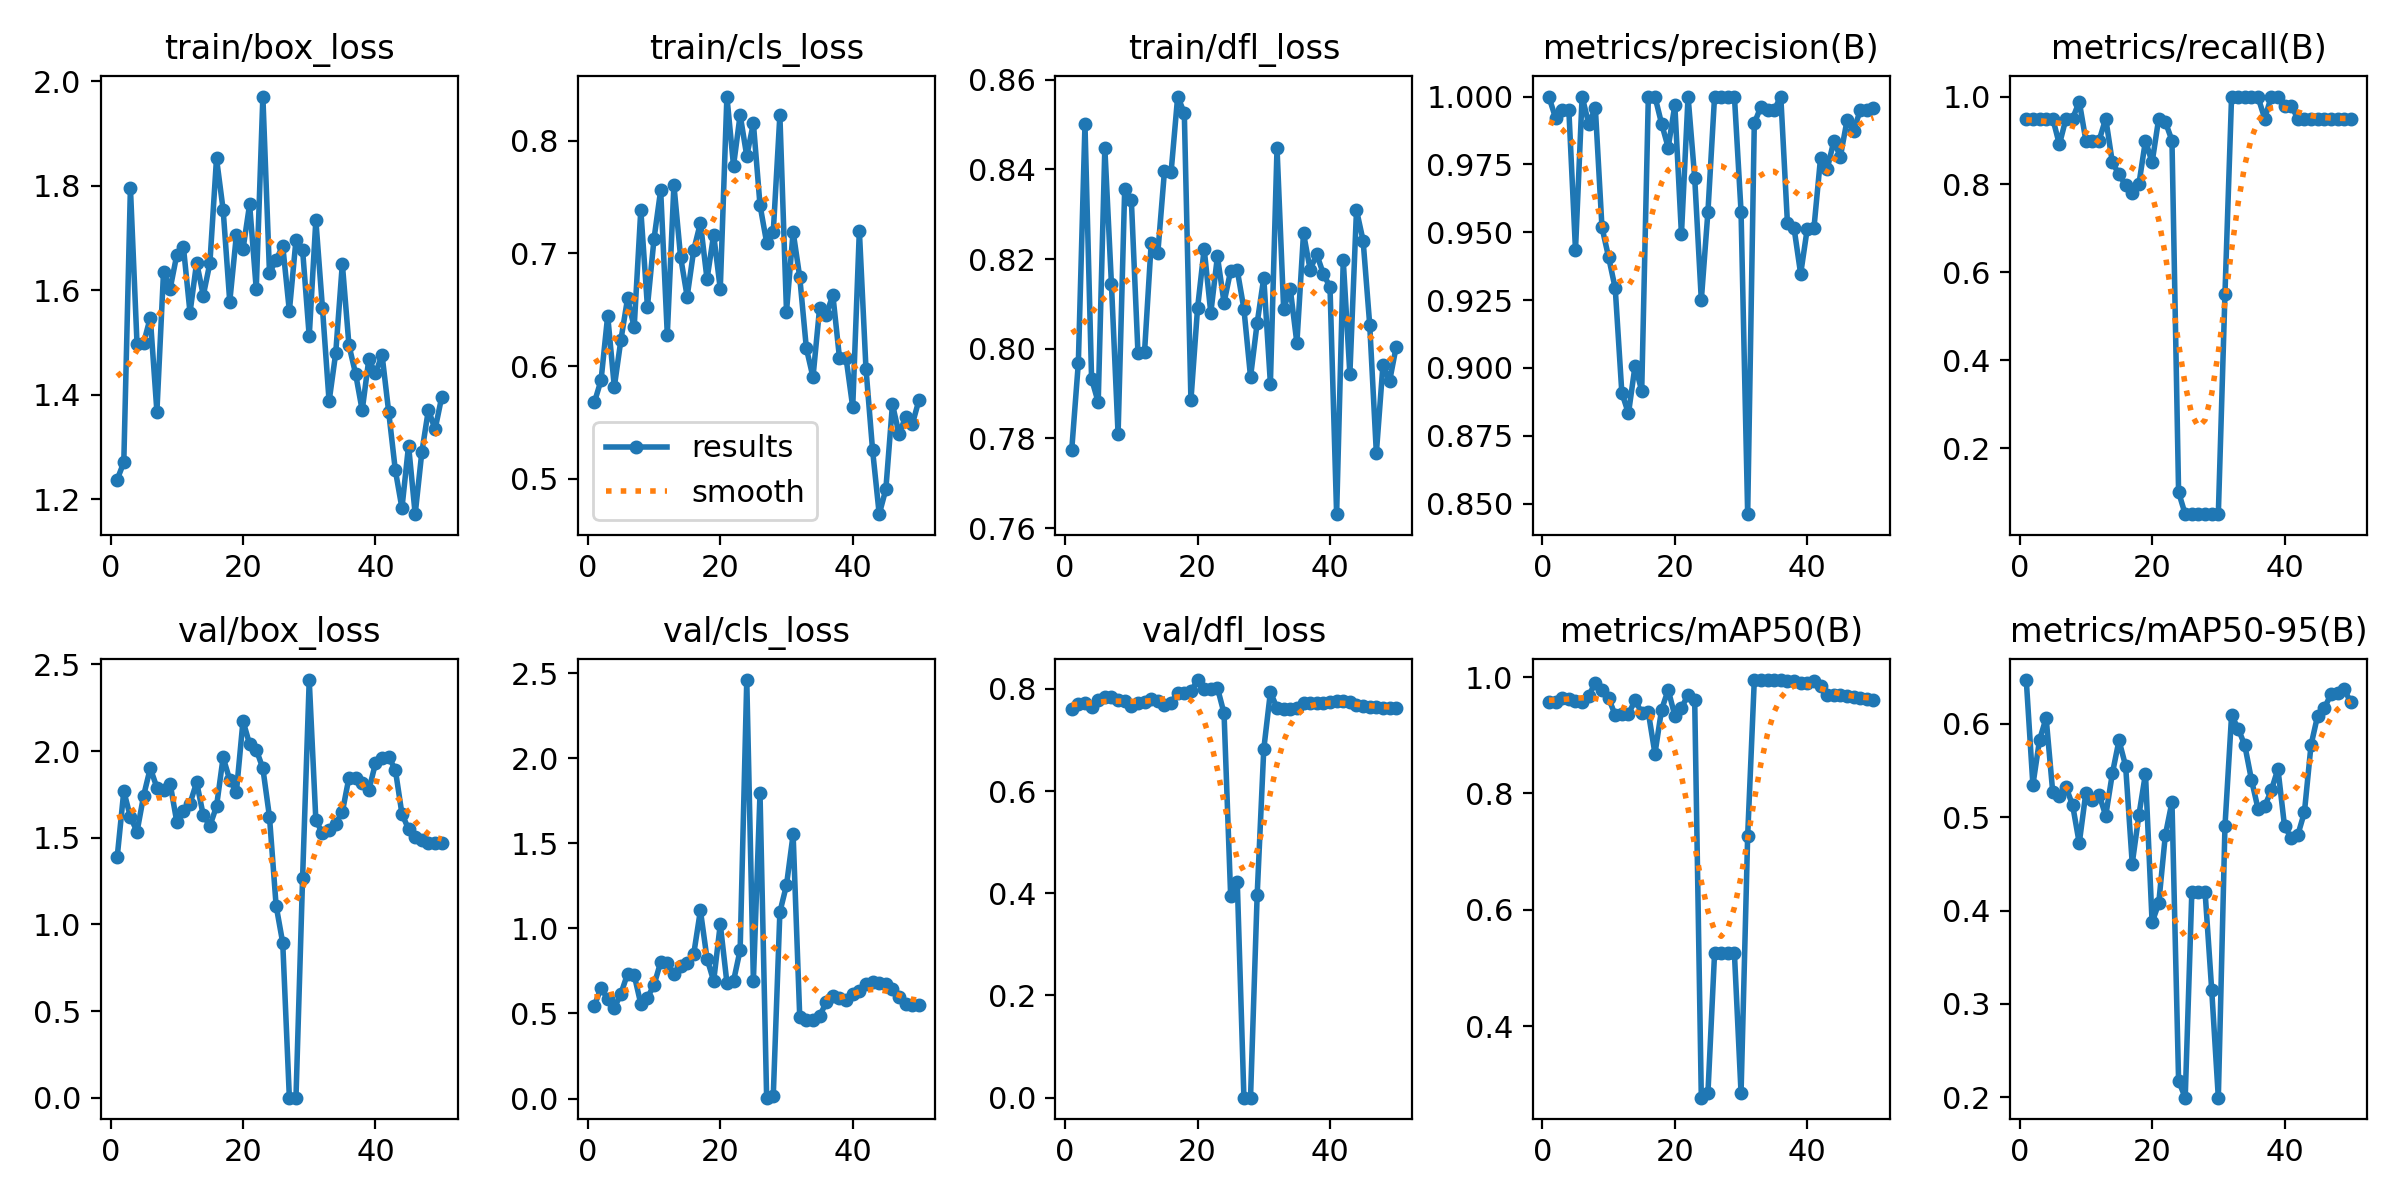

In [ ]:
## Plot of all the performance metrics
Image('/content/drive/MyDrive/Volleyball_v1/results150/results.png')

#Model Deployment

In [ ]:
## FIRST: Install ultralytics, connect to google drive
from ultralytics import YOLO

In [ ]:
## Run a TRACK model on video
# Update the path to the trained model weights
# Update the path to the test video
model = YOLO('/content/drive/MyDrive/Volleyball_v1/results150/weights/best.pt')
results = model.track('/content/drive/MyDrive/Colab Notebooks/Data/ProjectTestClip.mp4', conf=0.2, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/384) /content/drive/MyDrive/Colab Notebooks/Data/ProjectTestClip.mp4: 384x640 1 ball-j9d3, 363.0ms
video 1/1 (frame 2/384) /content/drive/MyDrive/Colab Notebooks/Data/ProjectTestClip.mp4: 384x640 1 ball-j9d3, 367.3ms
video 1/1 (frame 3/384) /content/drive/MyDrive/Colab Notebooks/Data/ProjectTestClip.mp4: 384x640 1 ball-j9d3, 349.3ms
video 1/1 (frame 4/384) /content/drive/MyDrive/Colab Notebooks/Data/ProjectTestClip.mp4: 384x640 1 bal